In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import pandas as pd

In [2]:
# PCA Class Implementation
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None

    def fit(self, X):
        # Step 1: Mean Centering
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Covariance Matrix
        cov_matrix = np.cov(X_centered.T)

        # Step 3: Eigen Decomposition
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Step 4: Sort Eigenvectors by Eigenvalues (Descending Order)
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[:, idxs]

        # Store the top 'n_components' eigenvectors
        self.components = eigenvectors[:, :self.n_components]
        self.explained_variance = eigenvalues[:self.n_components]

    def transform(self, X):
        # Project Data onto Principal Components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def plot_explained_variance(self):
        # Plot the explained variance ratio
        plt.figure(figsize=(8, 5))
        variance_ratio = self.explained_variance / np.sum(self.explained_variance)
        plt.bar(range(1, len(variance_ratio) + 1), variance_ratio, alpha=0.7)
        plt.xlabel('Principal Components')
        plt.ylabel('Variance Explained')
        plt.title('Explained Variance by Principal Components')
        plt.show()

In [3]:
# Load Iris Dataset
data = datasets.load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

In [4]:
# PCA Application
pca = PCA(n_components=2)
pca.fit(X)
X_projected = pca.transform(X)

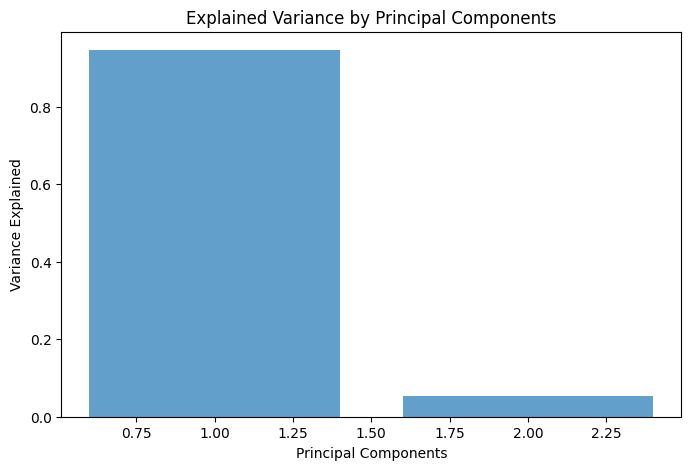

In [5]:
# Visualization of Explained Variance
pca.plot_explained_variance()

/tmp/ipykernel_61704/516085054.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, edgecolor='k', s=100, cmap=plt.cm.get_cmap('viridis', 3))


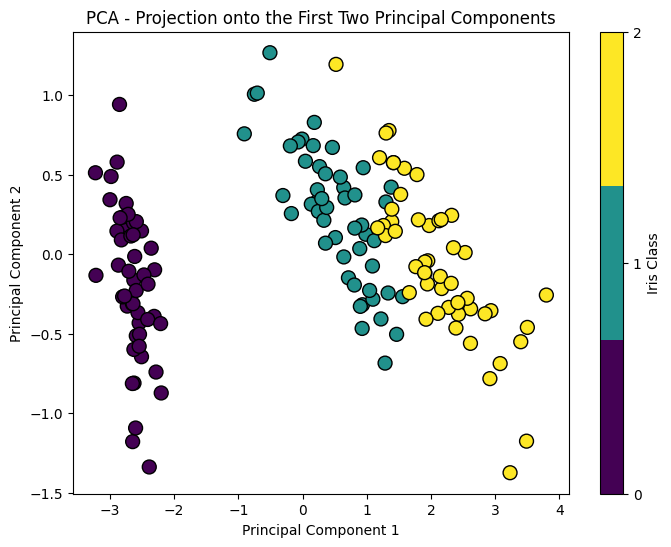

In [6]:
# Scatter Plot of Projected Data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, edgecolor='k', s=100, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Projection onto the First Two Principal Components')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Iris Class')
plt.show()

/tmp/ipykernel_61704/3950000884.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap=plt.cm.get_cmap('viridis', 3))


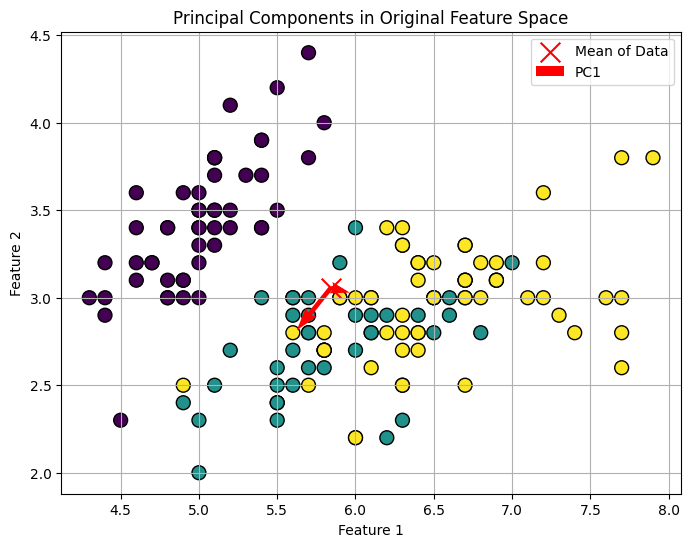

In [12]:
# Correcting the quiver plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap=plt.cm.get_cmap('viridis', 3))
plt.scatter(pca.mean[0], pca.mean[1], color='red', marker='x', s=200, label='Mean of Data')

# Correct quiver plot for principal components
origin = (pca.mean[0], pca.mean[1])  # Starting point for arrows

for i in range(pca.n_components):
    plt.quiver(origin[0], origin[1], 
               pca.components[0, i], pca.components[1, i], 
               color='red', scale=3, angles='xy', scale_units='xy', 
               label=f'PC{i+1}' if i == 0 else "")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Principal Components in Original Feature Space')
plt.legend()
plt.grid()
plt.show()


<Figure size 800x600 with 0 Axes>

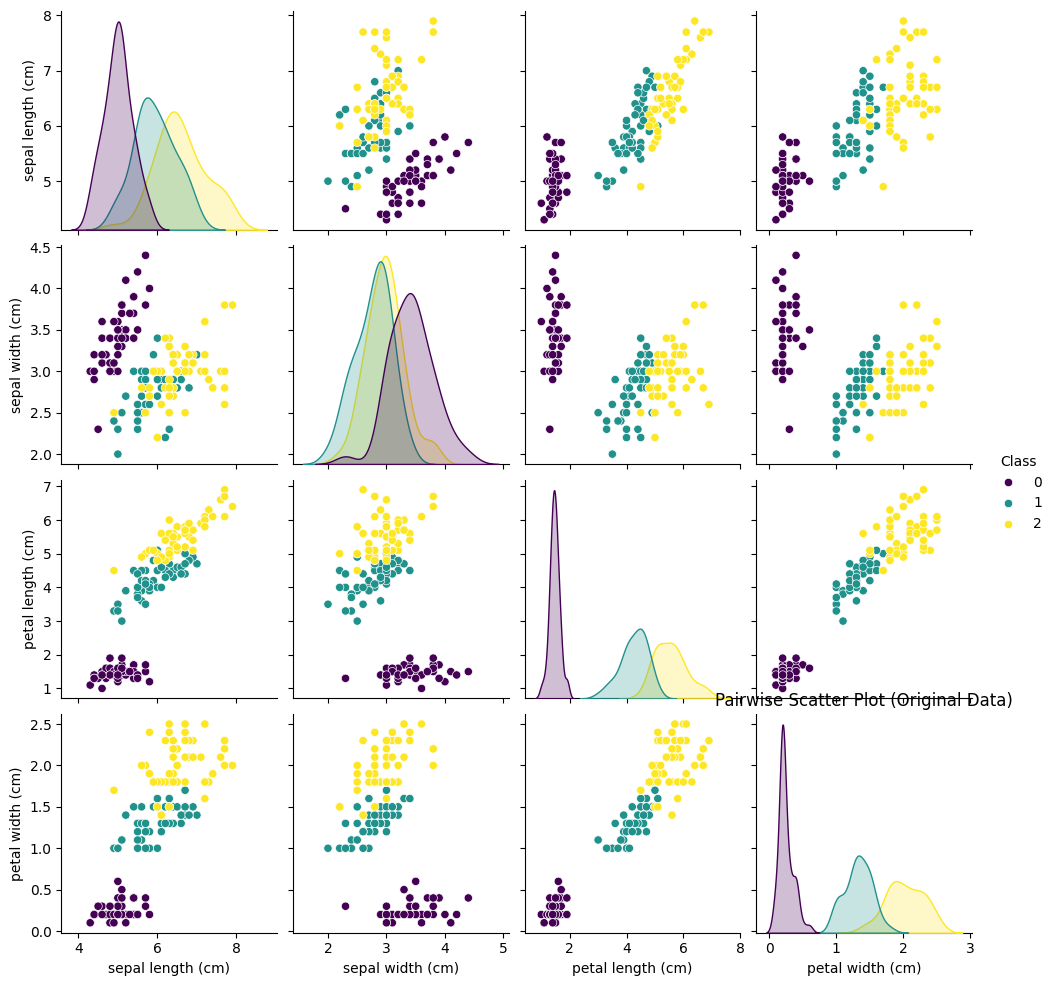

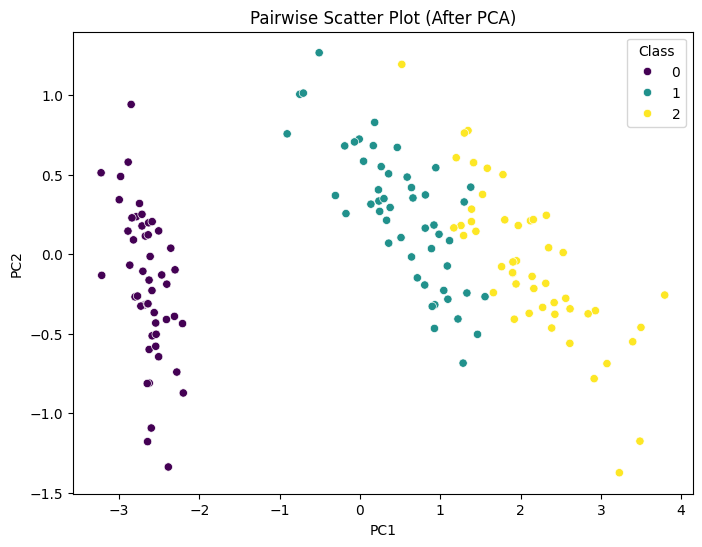

In [15]:
# 1️⃣ Pairwise Scatter Plots (Before and After PCA)
def plot_pairwise_scatter(X, X_pca, y, feature_names):
    # Original Data Plot
    df_original = pd.DataFrame(X, columns=feature_names)
    df_original['Class'] = y
    plt.figure(figsize=(8, 6))
    sns.pairplot(df_original, hue='Class', diag_kind='kde', palette='viridis')
    plt.title('Pairwise Scatter Plot (Original Data)')
    plt.show()

    # After PCA Plot
    df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_pca['Class'] = y
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class', palette='viridis')
    plt.title('Pairwise Scatter Plot (After PCA)')
    plt.show()

# 🧪 Run Visualizations
plot_pairwise_scatter(X, X_projected, y, feature_names)


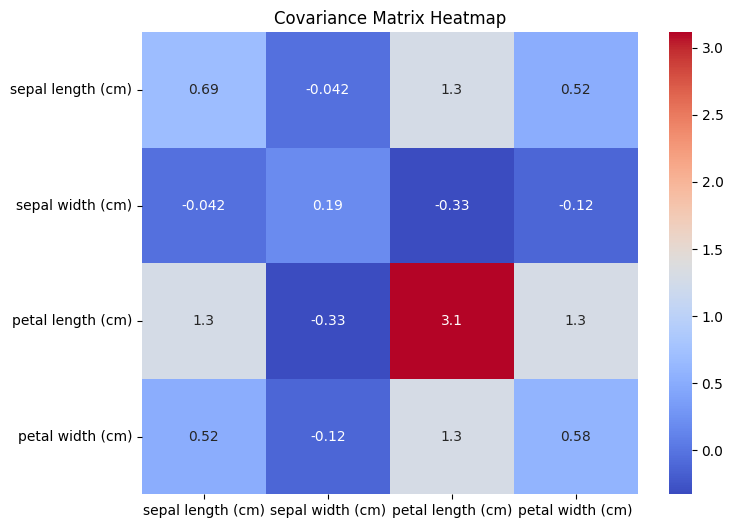

In [14]:
# 2️⃣ Covariance Matrix Heatmap
def plot_covariance_matrix(X):
    cov_matrix = np.cov(X, rowvar=False)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', xticklabels=feature_names, yticklabels=feature_names)
    plt.title('Covariance Matrix Heatmap')
    plt.show()
plot_covariance_matrix(X)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as SklearnPCA
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Load Iris Dataset
data = datasets.load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# 1️⃣ Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Interactive 3D PCA Plot (Using Plotly)
def plot_interactive_3d(X, y):
    pca = SklearnPCA(n_components=3)
    X_pca = pca.fit_transform(X)
    fig = px.scatter_3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
                        color=y, labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'},
                        title='Interactive 3D PCA Visualization')
    fig.show()

plot_interactive_3d(X_scaled, y)
